# 4.7 Lab: Logistic Regression, LDA, QDA, and KNN

## 4.7.1 Stock Market Dataset `smarket.csv`

In [2]:
import pandas as pd 
df = pd.read_csv('/Users/bernardoivogoltz/Documents/Projetos/toolbox_matematica/statistical_learning/datasets/Smarket.csv')

df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [18]:
print(df.columns)

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')


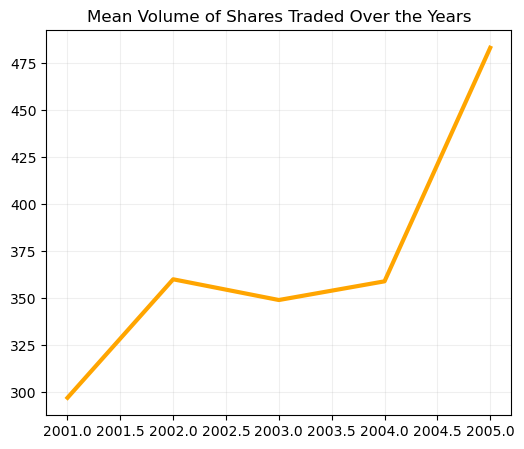

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5) , dpi = 100)
df_grouped = df.groupby('Year')['Volume'].sum().reset_index()
plt.title('Mean Volume of Shares Traded Over the Years')
plt.plot(df_grouped['Year'], df_grouped['Volume'] , linewidth = 3 , color = 'orange' , alpha = 1)
plt.grid(alpha = 0.2)

## 4.7.2 Logistic Regression

In [26]:
import statsmodels.api as sm


X = df.drop(columns=['Year', 'Direction', 'Today'])
y = (df['Direction'] == 'Up').astype(int)

# 2. Adicionar intercepto
X = sm.add_constant(X)

# 3. Ajustar modelo logístico
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

# 4. Report estatístico
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1243
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -863.79
Date:                Sun, 04 May 2025   Deviance:                       1727.6
Time:                        11:29:35   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002868
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.6

In [27]:
result.params

const    -0.126000
Lag1     -0.073074
Lag2     -0.042301
Lag3      0.011085
Lag4      0.009359
Lag5      0.010313
Volume    0.135441
dtype: float64